In [17]:
%matplotlib inline 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
%config InlineBackend.rc={'figure.figsize': (25,15)}

In [18]:
fifa = pd.read_csv('fifadata.csv') #Lendo o dataframe

In [19]:
fifa.head() # 5 Primeiras linhas



,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89


In [20]:
#Descrição do dataframe, para coletar maior e menor rating do fifa
fifa['Rating'].describe()


count    17588.000000
mean        66.166193
std          7.083012
min         45.000000
25%         62.000000
50%         66.000000
75%         71.000000
max         94.000000
Name: Rating, dtype: float64

In [21]:
#Jogador que possui maior precisão em cobrança de falta 
falta_acuracia=fifa['Freekick_Accuracy'].describe() 
falta_acuracia['max'] # Coleta o valor do max encontrado no describe acima
fifa.loc[fifa['Freekick_Accuracy'] == falta_acuracia['max'] ] # Utiliza o loc para encontrar este valor e 
                                                              #trazer o registro que o contem

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
286,Andrea Pirlo,Italy,NaN,NaN,NYCFC,CM,21.0,07/06/2015,2023.0,82,...,65,92,93,84,76,5,5,1,4,2


In [22]:
#Verificando se o melhor goleiro é realmente o que possui a maior soma das habilidades destinadas a posição.

somahabilidades=(fifa['GK_Positioning'] + fifa['GK_Diving'] + fifa['GK_Kicking']
                    + fifa['GK_Handling'] + fifa['GK_Reflexes'])

melhorgk=somahabilidades.argmax() #Todos jogadores tiveram estas habilidades somadas, 
                                  # então o argmax() traz o que tem a maior soma 



fifa.loc[melhorgk] # Localizando pela maior soma 





Name                     Manuel Neuer
Nationality                   Germany
National_Position                  GK
National_Kit                        1
Club                        FC Bayern
Club_Position                      GK
Club_Kit                            1
Club_Joining               07/01/2011
Contract_Expiry                  2021
Rating                             92
Height                         193 cm
Weight                          92 kg
Preffered_Foot                  Right
Birth_Date                 03/27/1986
Age                                31
Preffered_Position                 GK
Work_Rate             Medium / Medium
Weak_foot                           4
Skill_Moves                         1
Ball_Control                       48
Dribbling                          30
Marking                            10
Sliding_Tackle                     11
Standing_Tackle                    10
Aggression                         29
Reactions                          85
Attacking_Po

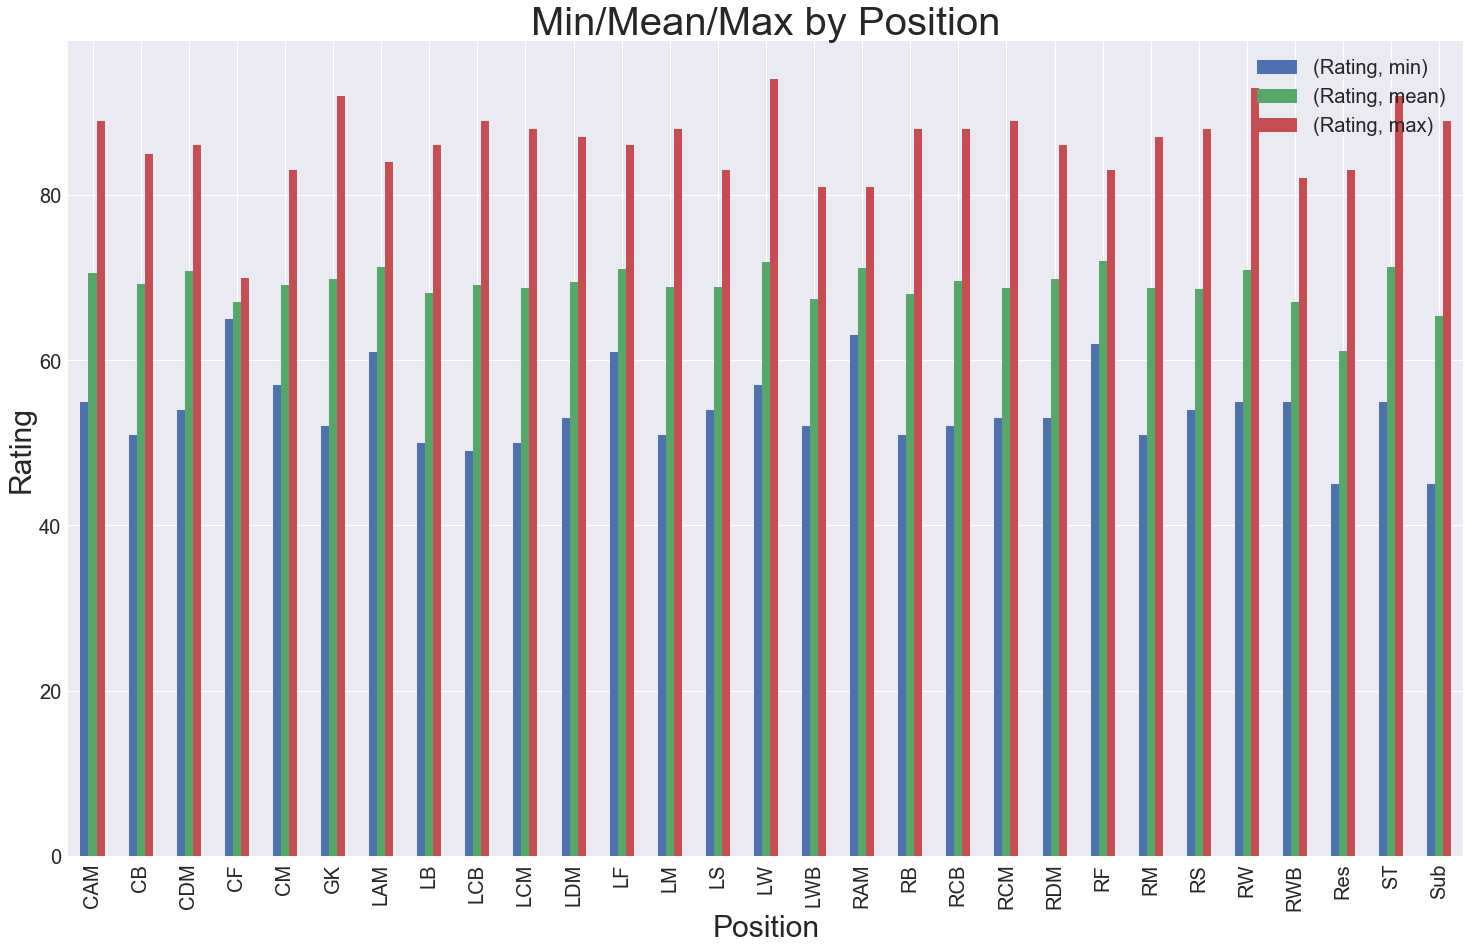

In [23]:
# Maior, media e menor rating por posição, podendo verificar qual possui mais craques. 

rating=(fifa.groupby('Club_Position') #Agrupa por posição
        .aggregate({'Rating':[min,np.mean,max]}) #Agrega o min media e max do Rating
        .plot(kind='bar',fontsize=20) ) #Plota os dados 

plt.ylabel('Rating',fontsize=30) #Titulo eixo y 
plt.xlabel('Position',fontsize=30) #Titulo eixo x 
plt.title('Min/Mean/Max by Position',fontsize=40) # Titulo do grafico 

plt.legend(loc=1, prop={'size': 20}) #Tamanho e localização da legenda 

plt.show() #Mostra o grafico.


#plt.savefig('grafico1.png') #Para salvar a figura no diretório

In [24]:
#Tabela que foi gerada pelo groupby + aggregate da celula acima. 

fifa.groupby('Club_Position').aggregate({'Rating':[min,np.mean,max]})


Rating               
                 min       mean max
Club_Position                      
CAM               55  70.590476  89
CB                51  69.277108  85
CDM               54  70.848739  86
CF                65  67.000000  70
CM                57  69.164557  83
GK                52  69.825949  92
LAM               61  71.250000  84
LB                50  68.103825  86
LCB               49  69.164818  89
LCM               50  68.779661  88
LDM               53  69.492481  87
LF                61  71.083333  86
LM                51  68.818841  88
LS                54  68.809756  83
LW                57  71.842105  94
LWB               52  67.444444  81
RAM               63  71.222222  81
RB                51  68.056569  88
RCB               52  69.567141  88
RCM               53  68.747875  89
RDM               53  69.819549  86
RF                62  72.000000  83
RM                51  68.789855  87
RS                54  68.631068  88
RW                55  70.939850  93
RWB               55  67.088889  82
Res               45  61.063255  83
ST                55  71.269953  92
Sub               45  65.371730  89

In [25]:
fifa.groupby('Name').aggregate({'Rating':[max]}) #Teste de groupby, coleta o rating de todos jogadores. 



,Rating
,max
Name,
A.J. DeLaGarza,69
Aapo Halme,57
Aaron Amadi-Holloway,57
Aaron Appindangoye,69
Aaron Barry,58
Aaron Bolger,49
Aaron Calver,58
Aaron Chapman,58


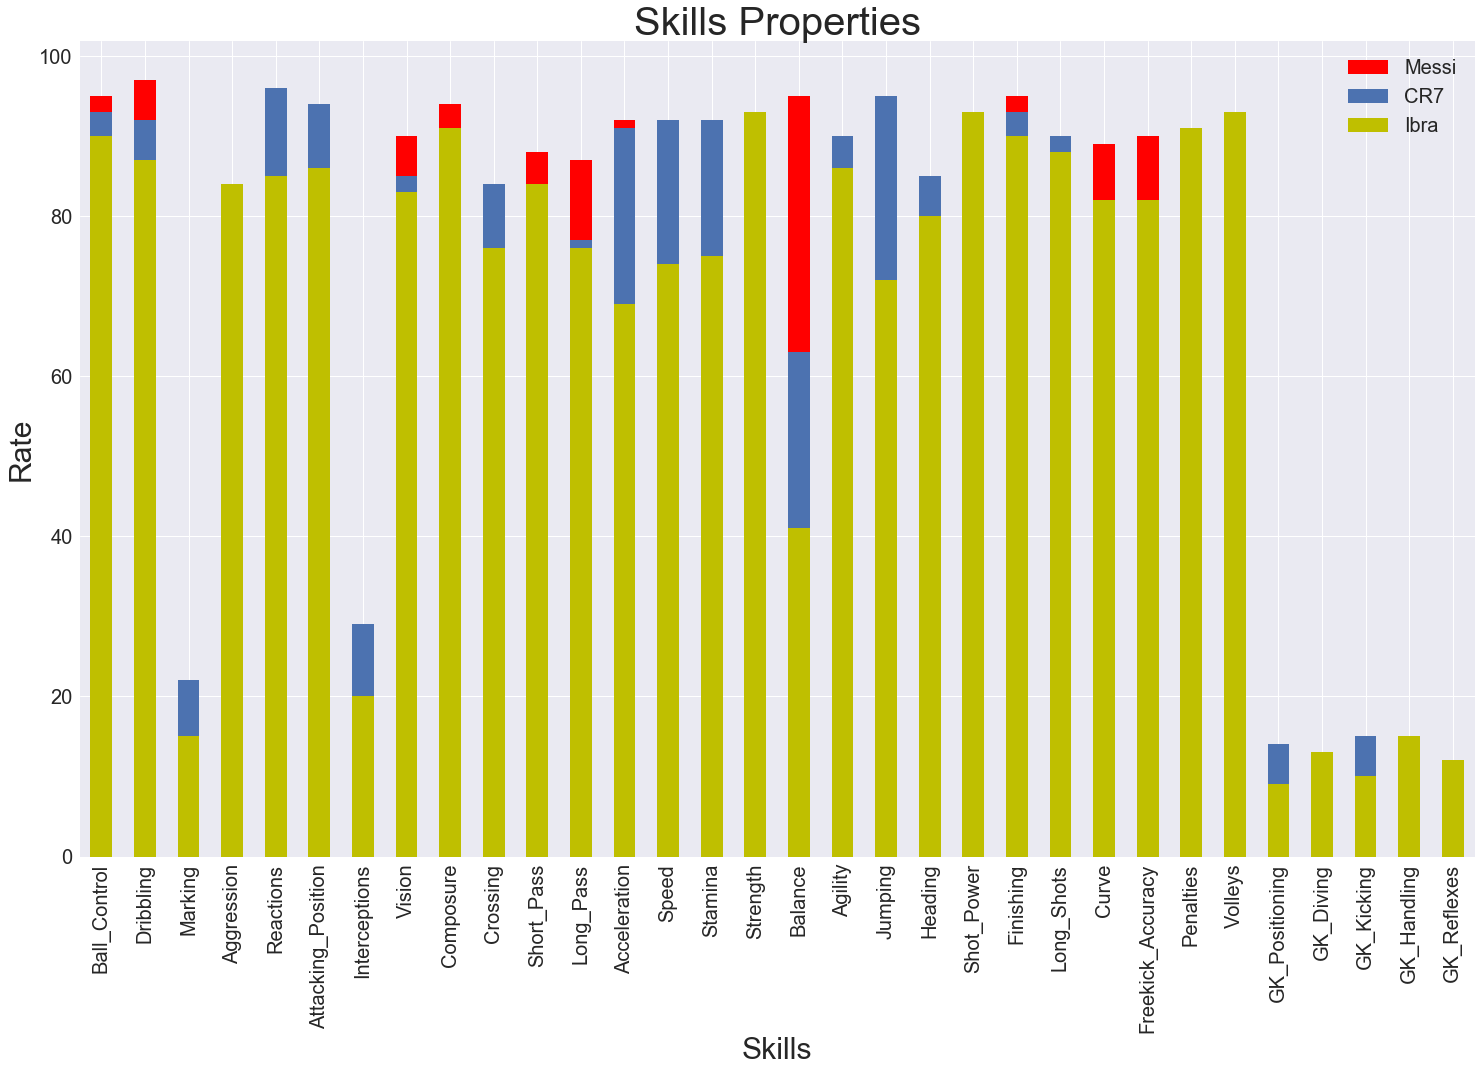

In [31]:
attributes = ['Ball_Control','Dribbling','Marking','Aggression','Reactions', 'Attacking_Position',
       'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass',
       'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance',
       'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
       'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys',
       'GK_Positioning', 'GK_Diving', 'GK_Kicking', 'GK_Handling',
       'GK_Reflexes'] #São todos atributos dos jogadores. 


#Funções abaixo plotam estes atributos de cada jogador definido pela posição que estão no dataset

fig, ax = plt.subplots()
messi=fifa.loc[1][attributes].plot(kind='bar',color='r',label='Messi',fontsize=20)
cr7 = fifa.loc[0][attributes].plot(kind='bar',label='CR7')
zlatan = fifa.loc[8][attributes].plot(kind='bar',color='y',label="Ibra")
ax.set_ylabel('Rate', fontsize=30)
plt.legend(loc=1, prop={'size': 20})
plt.xlabel('Skills',fontsize=30)
plt.title('Skills Properties',fontsize=40)


 
plt.show() #Mostra o grafico.



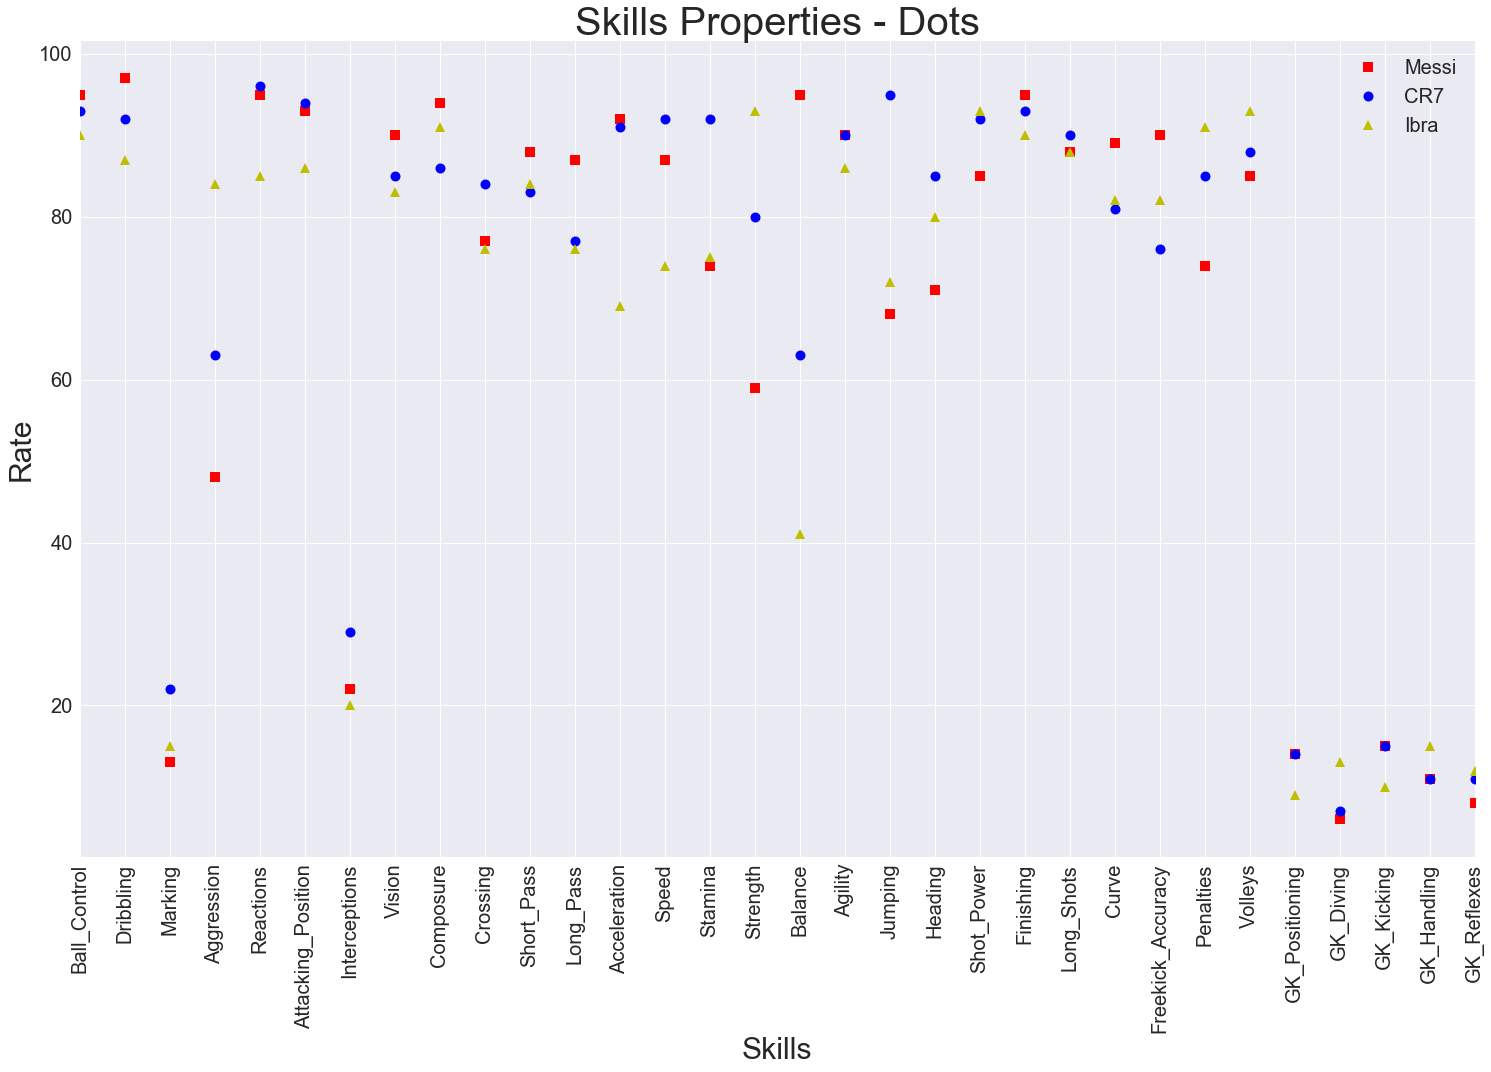

In [32]:
#Mesma representação do grafico acima porem em pontos, para melhor visualização. 

fig, ax = plt.subplots()

#Encontra o Messi pelo indice [1] que é a posição dele no dataframe 
messi=fifa.loc[1][attributes].plot(color='r', #Define a cor de seus pontos
                                   label='Messi', #Texto da legenda atribuida 
                                   ls='none',#ls=none deixa os pontos sem serem ligados por alguma linha
                                   marker='s', #define o marcador s=Square , quadrado 
                                   ms=10,#Tamanho do simbolo 
                                   fontsize=20) #Tamanho da fonte escrita na legenda. 

cr7 = fifa.loc[0][attributes].plot(color='b',label='CR7',ls='none',marker='o',ms=10) #Idem ao anterior
zlatan = fifa.loc[8][attributes].plot(color='y',label="Ibra",ls='none',marker='^',ms=10) # Idem ao anterior
x_axis = range(len(attributes))#tamanho do eixo X , range dos valores 
ax.set_ylabel('Rate', fontsize=30) #Nome e Tamanho do titulo eixo y
ax.set_xlabel('Skills', fontsize=30) #Nome e Tamanho do titulo eixo x 
ax.set_xticks(x_axis)#Define os valores do eixo X, fazendo todos aparecerem neste eixo.
ax.set_xticklabels(attributes,rotation='vertical',fontsize=20) #atribui a legenda os nomes dos vertices 
plt.legend(loc=1, prop={'size': 20}) #Tamanho da legenda
plt.title('Skills Properties - Dots',fontsize=40) # Titulo e tamanho do titulo


plt.show() #Mostra o grafico.



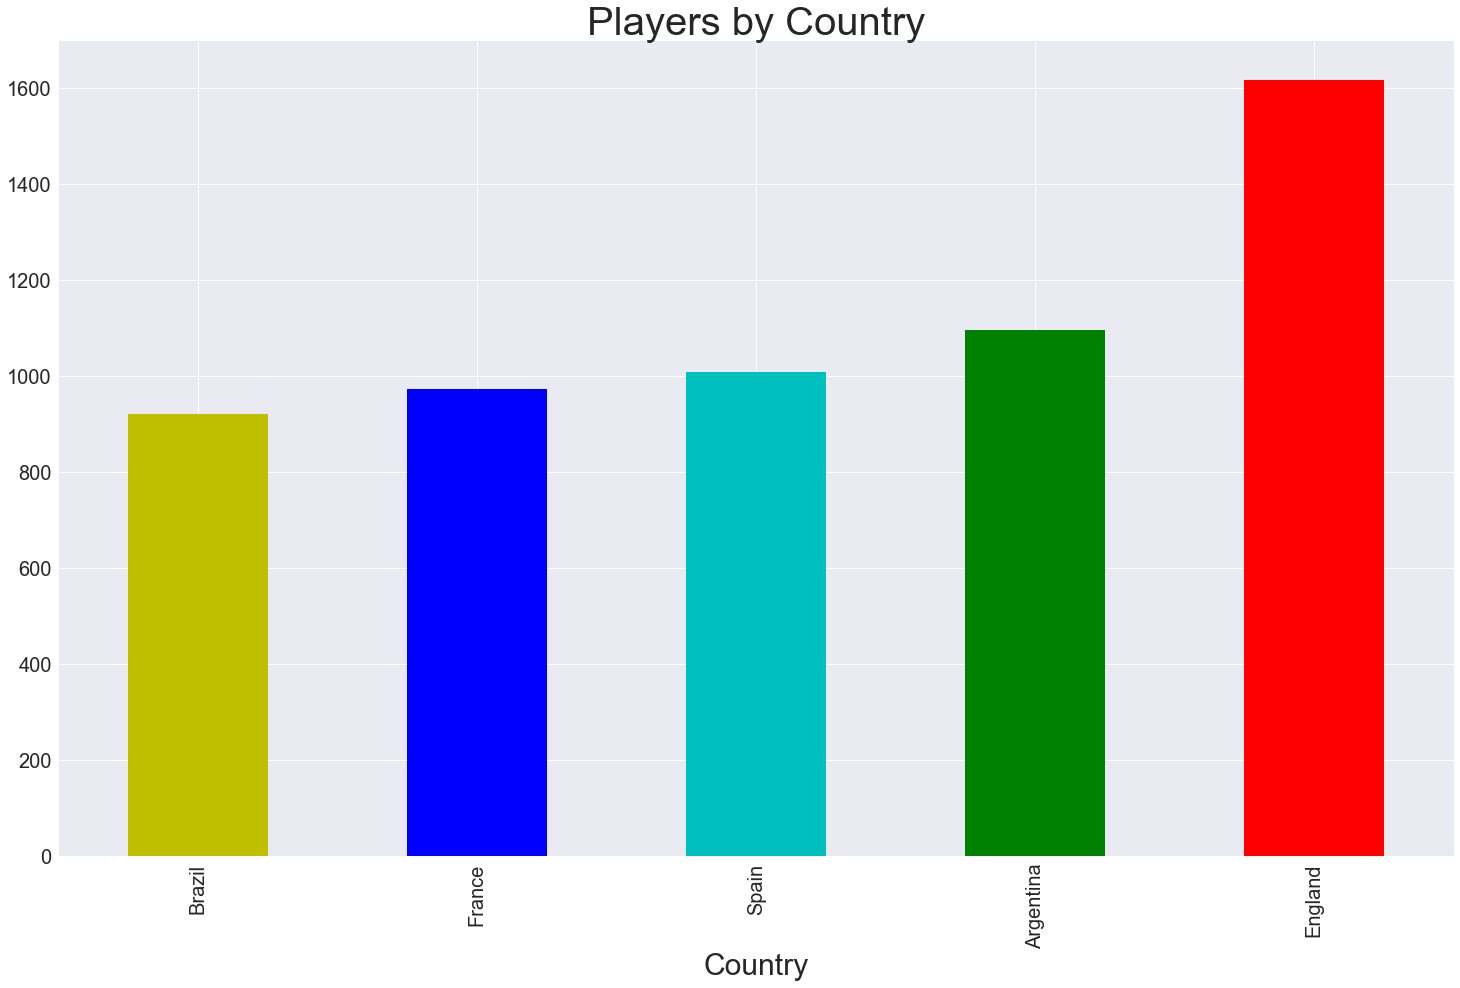

In [33]:
#Qual pais tem o maior numero de jogadores no FIFA? 
#O grafico abaixo mostra as 5 nacionalidades mais presentes no FIFA17.

Nationality_count=fifa.groupby(['Nationality']).count() #Agrupando por nacionalidade e contando
Top5Nat=Nationality_count.sort_values(['Name']).tail() #Alinha pela coluna 'names' que é apenas uma contagem,
                                                       #e pega os 5 ultimos valores
Top5Nat.drop(Top5Nat.columns[1:52],axis=1,inplace=True)
Top5Nat.columns = ["Players Count"]


Colors=['y','b','c','g','r']

Top5Nat.plot(kind='bar',fontsize=20,color=Colors,legend=None)
plt.title('Players by Country',fontsize=40)
plt.xlabel('Country',fontsize=30)



plt.show() #Mostra o grafico.

    


In [34]:
#Jogadores pela nacionalidade 

playerbycountry=(fifa.groupby(['Nationality', 'Name'])
                 .aggregate({'Rating':[max]}))#Agrupa por nacionalidade e nome e traz o rating max. 
                    
playerbycountry

Rating
                                   max
Nationality Name                      
Afghanistan Maziar Kouhyar          54
            Noor Husin              55
Albania     Agim Zeka               59
            Agon Mehmeti            63
            Albion Avdijaj          55
            Alfred Ajdarević        54
            Amir Abrashi            72
            Arlind Ajeti            68
            Armando Sadiku          65
            Armando Vajushi         63
            Bekim Balaj             71
            Berat Djimsiti          66
            Bradhec Bytyqi          51
            Edgar Çani              65
            Egli Kaja               54
            Elseid Hysaj            79
            Emanuele Ndoj           60
            Entonjo Elezaj          54
            Ergys Kace              72
            Ermir Lenjani           70
            Etrit Berisha           78
            Flo Bojaj               55
            Frédéric Veseli         64
            Jahmir Hyka             71
            Jürgen Gjasula          70
            Keidi Bare              62
            Ledian Memushaj         72
            Leonardo Maloku         55
            Migjen Basha            71
            Mërgim Mavraj           76
...                                ...
Wales       Sam Jones               54
            Sam Vokes               73
            Shaun MacDonald         67
            Simon Church            66
            Steve Morison           67
            Tom Bradshaw            68
            Tom James               62
            Tom Lawrence            72
            Tom Lockyer             67
            Tom Owen-Evans          51
            Tommy O'Sullivan        59
            Troy Brown              62
            Tyler Roberts           60
            Wayne Hennessey         75
            Wes Burns               65
            Will Aimson             59
Zambia      Chisamba Lungu          73
            Evans Kangwa            69
            Lewis Macha             64
            Stoppila Sunzu          72
Zimbabwe    Edmore Chirambadare     65
            Knowledge Musona        73
            Macauley Bonne          59
            Marvelous Nakamba       72
            Matthew Rusike          66
            Michelle Katsvairo      64
            Silas Songani           55
            Tendai Ndoro            73
            Tinotenda Kadewere      60
            Willard Katsande        75

[17441 rows x 1 columns]

In [37]:
#Top 5 por país, traz a lista de 5 jogadores com mais rating de cada pais. 
nationality=fifa.Nationality.unique() #Transforma dataframe em uma unica lista contendo as nacionalidades

dataframe=[] #cria um dataframe

for i in nationality: #Procura e separa do dataframe playersbycountry com os 5 ultimos  q tem rating max
    data=playerbycountry.loc[i].sort(max).tail() #A variavel i escreve o nome dos paises e localiza 
    dataframe.append(data) #dataframe anexa a ele o valor. 
    
print(dataframe)  #imprime a lista. 


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


[                  Rating
                     max
Name                    
Quaresma              83
William Carvalho      83
Adrien Silva          83
Pepe                  88
Cristiano Ronaldo     94,                 Rating
                   max
Name                  
Ángel Di María      86
Paulo Dybala        86
Gonzalo Higuaín     89
Sergio Agüero       89
Lionel Messi        93,              Rating
                max
Name               
Miranda          86
Marcelo          86
Coutinho         86
Thiago Silva     89
Neymar           92,                         Rating
                           max
Name                          
Fernando Néstor Muslera     82
José María Giménez          83
Edinson Cavani              86
Diego Godín                 88
Luis Suárez                 92,                Rating
                  max
Name                 
Philipp Lahm       88
Toni Kroos         88
Jérôme Boateng     89
Mesut Özil         89
Manuel Neuer       92,              Rating
      

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


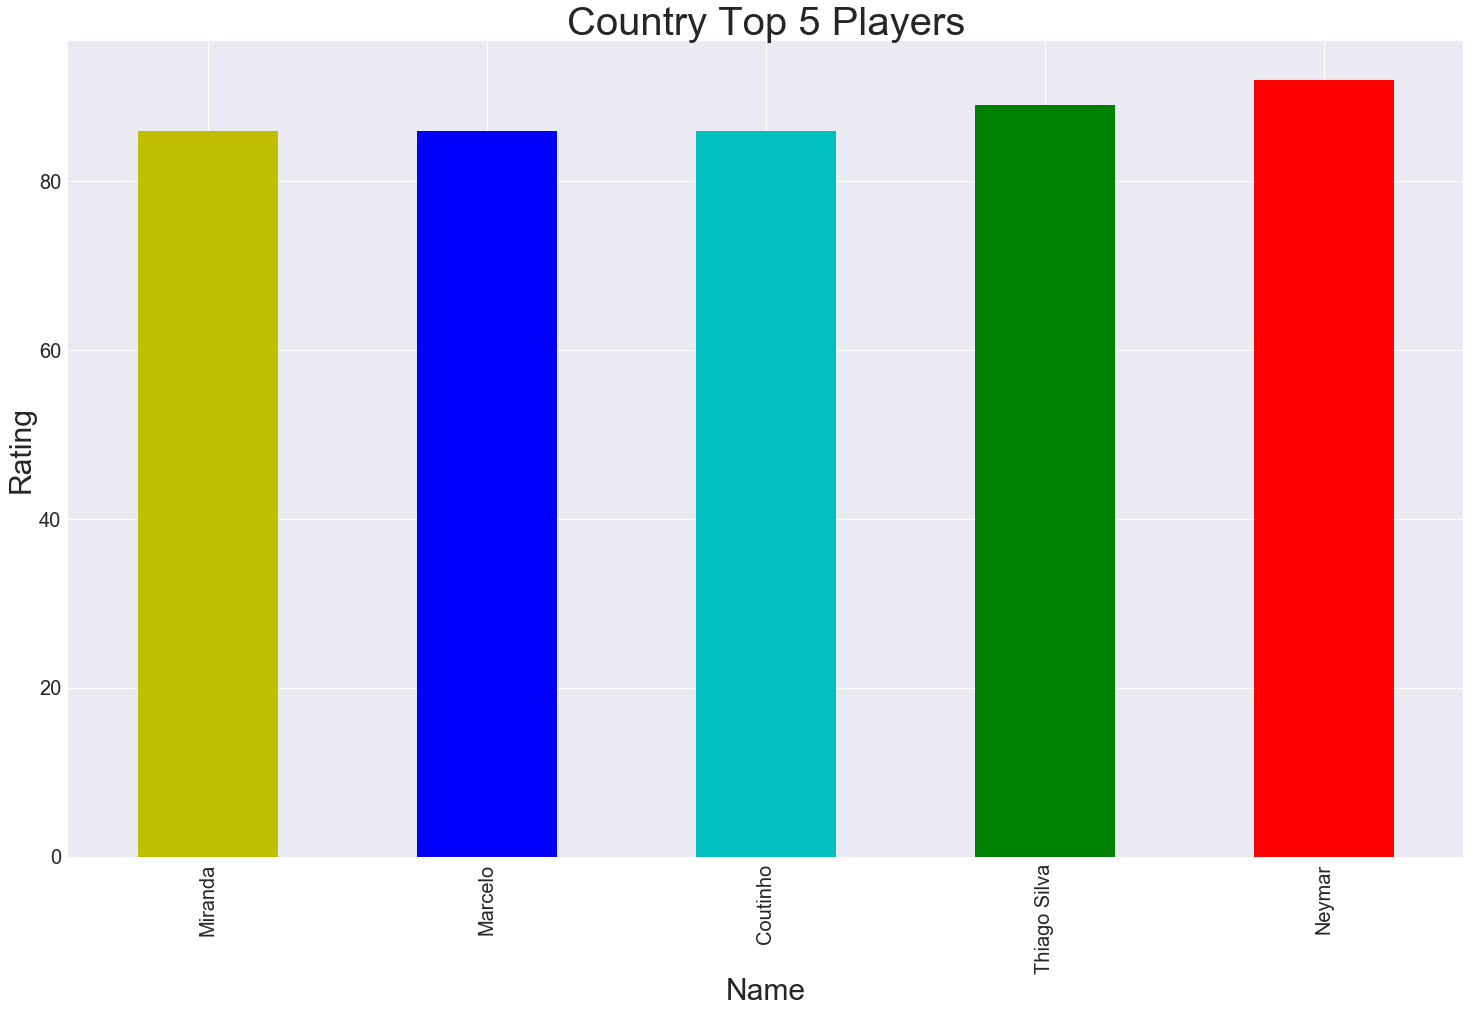

In [38]:
#Top 5 jogadores por pais 

(playerbycountry.loc['Brazil'] #Localiza "Brazil" no dataframe playerbycountry 
 .sort(max) #Ordena por valor maxima, ficando os minimos em cima e maximos abaixo. 
 .tail()#Coleta os 5 ultimos
 .plot(kind='bar',fontsize=20,color=Colors,legend=None)) #Plota os 5 ultimos jogadores do Brazil com seus nomes
                                                         #e Rating


plt.xlabel('Name',fontsize=30) #legenda eixo x
plt.ylabel('Rating',fontsize=30) #legenda eixo y
plt.title('Country Top 5 Players',fontsize=40) #Titulo grafico 

                                                       
plt.show() #Mostra o grafico.


